# Simple Model Example

There are two ways of running a simple eCalc™ model:

1. Specifying a YAML model
2. Specifying a Python model

Here we will look at both scenarios:

## The Simple Model
The Simple used in this example is the reference case in [eCalc™ Docs - Simple Model Example](https://equinor.github.io/ecalc/docs/about/modelling/examples/simple).

The model consists of a single installation with:
- Flare
- Gas Export Compressor
- Generator set A:
    - Base Production Load
    - Gas Injection Compressor
    - Produced Water Re-injection Pump
    - Seawater Injection Pump

The model.yaml file contains references to:
- production_data.csv
- genset.csv
- compressor_sampled.csv
- compressor_sampled_with_turbine.csv
- pump_sampled.csv
- pump_chart.csv

## Yaml Model
A YAML model consists of a main YAML file and may reference to other input files - usually CSV-files for timeseries inputs.
For more details about creating a model in YAML, see the [eCalc™ Docs](https://equinor.github.io/ecalc/docs/about)

All files for the example can be found in the directory references in the code below.

Here is how you load and run a YAML-model in eCalc™

In [2]:
from pathlib import Path

from ecalc_cli.infrastructure.file_resource_service import FileResourceService
from libecalc.common.time_utils import Frequency
from libecalc.examples import simple
from libecalc.presentation.yaml.file_configuration_service import FileConfigurationService
from libecalc.presentation.yaml.model import YamlModel

model_path = Path(simple.__file__).parent / "model.yaml"
configuration_service = FileConfigurationService(configuration_path=model_path)
configuration = configuration_service.get_configuration()
resource_service = FileResourceService(working_directory=model_path.parent, configuration=configuration)
yaml_model = YamlModel(
    configuration=configuration,
    resource_service=resource_service,
    output_frequency=Frequency.NONE,
)

yaml_model.evaluate_energy_usage()
yaml_model.evaluate_emissions()
result = yaml_model.get_graph_result()

Iterating the model components to plot results: 



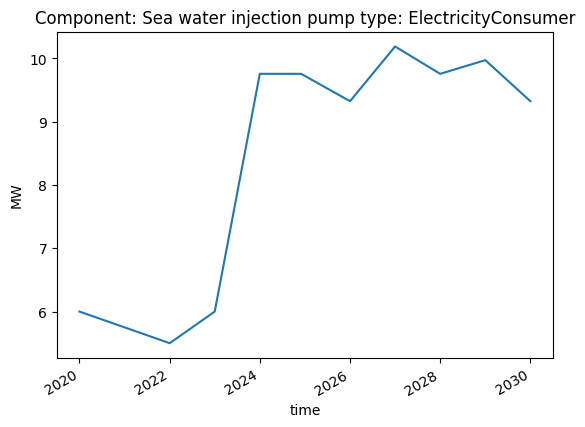

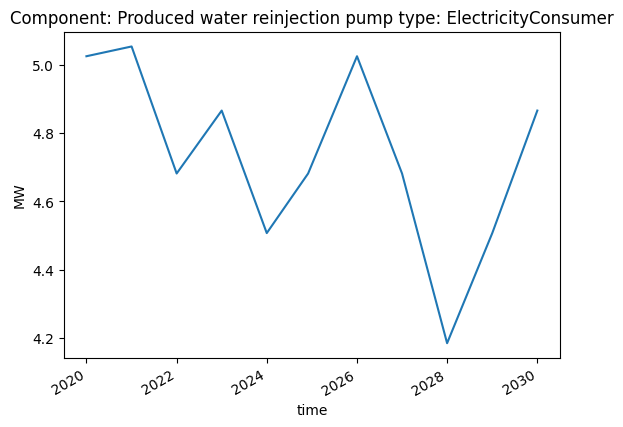

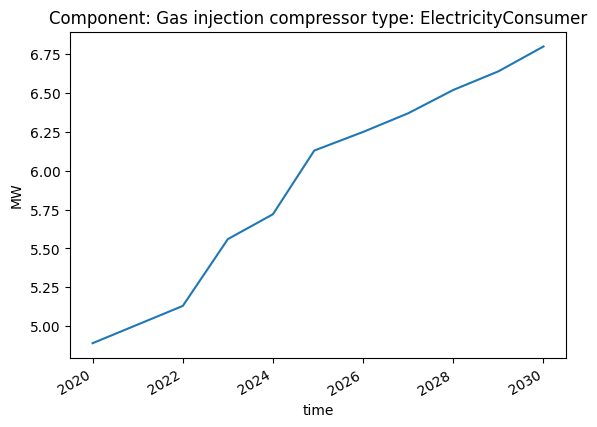

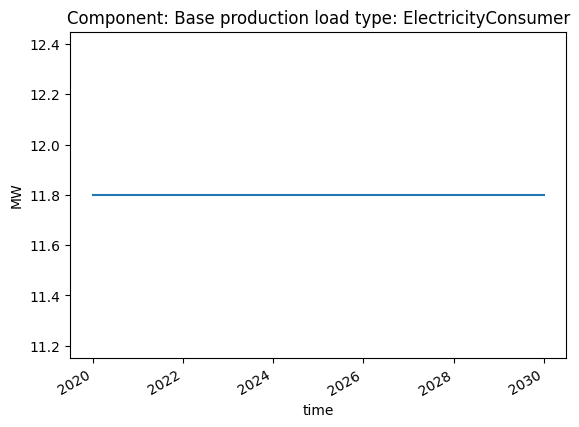

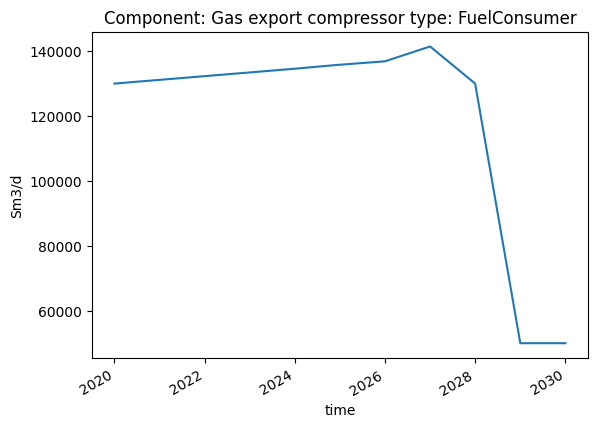

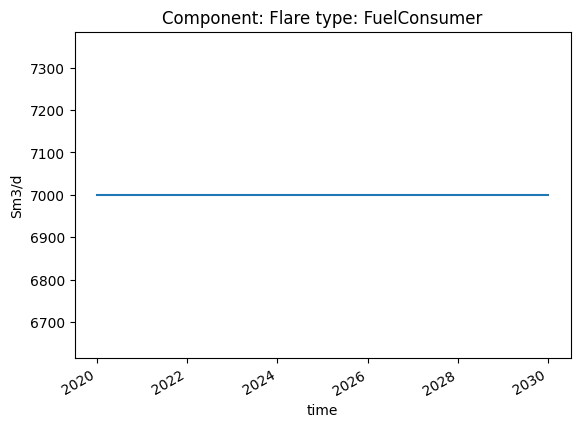

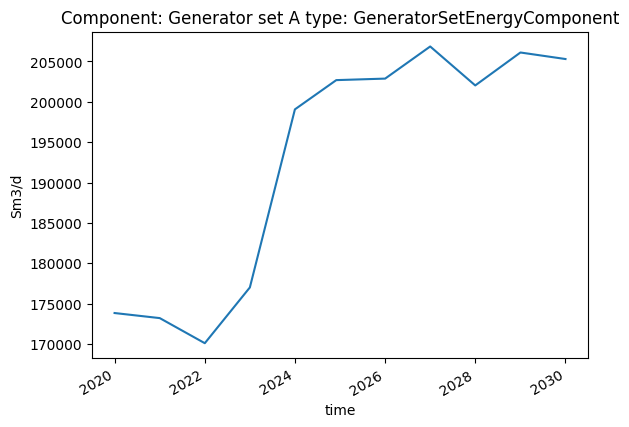

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

print("Iterating the model components to plot results: \n")
for component in yaml_model.get_energy_components():
    if component.id in result.consumer_results:
        component_result = result.consumer_results[component.id]
        ds = pd.Series(component_result.energy_usage.values, index=component_result.energy_usage.periods.start_dates)
        _ = ds.plot(
            xlabel="time",
            ylabel=component_result.energy_usage.unit,
            title=f"Component: {component.name} type: {type(component).__name__}",
            kind="line",
        )
        plt.show(block=False)  # block=False in order to run in CI-tests.

In [5]:
# Dummy test in order to test to assert that this notebook runs in GitHub Actions
def test_notebook_works():
    assert True